### 图像金字塔

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("src/img/lena.png")

def cv_show(img, name='img'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [2]:
img.shape

(512, 512, 3)

(<AxesSubplot:title={'center':'(256, 256, 3)'}>,
 Text(0.5, 1.0, '(256, 256, 3)'))

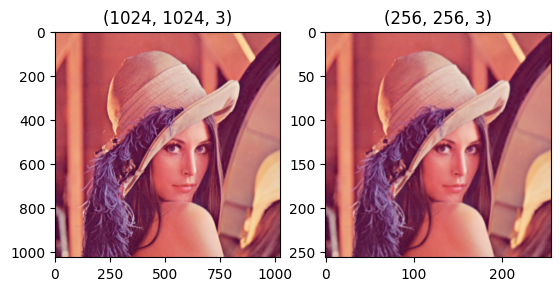

In [6]:
up = cv2.pyrUp(img)
down = cv2.pyrDown(img)

plt.subplot(121), plt.imshow(up[...,::-1]),plt.title(up.shape)
plt.subplot(122), plt.imshow(down[...,::-1]),plt.title(down.shape)

(<matplotlib.image.AxesImage at 0x7fccdde91810>,
 Text(0.5, 1.0, '(512, 512, 3)'))

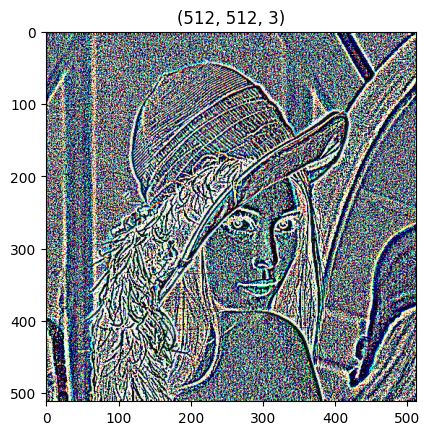

In [7]:
down2 = cv2.pyrDown(img)
up2 = cv2.pyrUp(down2)
l = img - up2
plt.imshow(l[...,::-1]),plt.title(l.shape)

### 图像轮廓

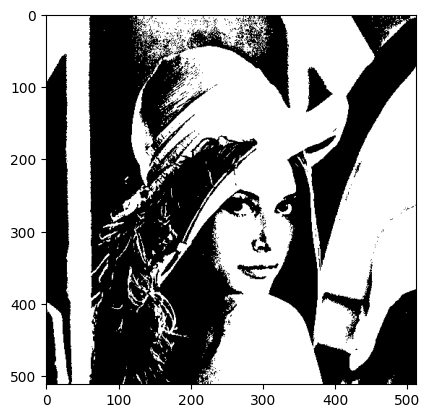

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

In [13]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [17]:
np.array(contours).shape

/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(1324,)

绘制轮廓

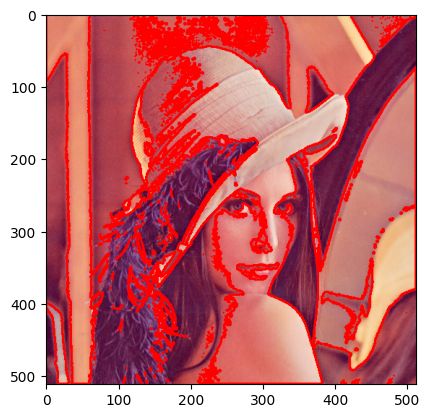

In [15]:
img_copy = img.copy()
# 传入图像，轮廓，轮廓索引，颜色模式，线条厚度
res = cv2.drawContours(img_copy, contours, -1, (0,0,255), 2)
plt.imshow(res[...,::-1])

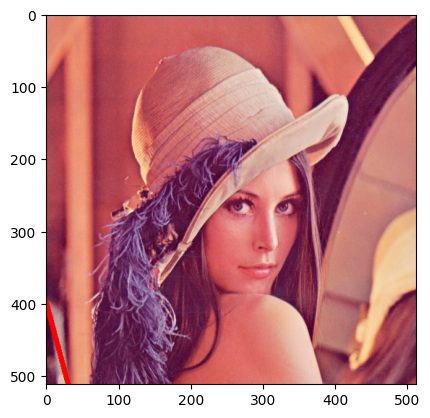

In [35]:
cnt = contours[93]

epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

img_copy_gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
res = cv2.drawContours(img_copy, [approx], -1, (0,0,255), 5)
plt.imshow(res[...,::-1])

In [27]:
cnt = contours[93]
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect = w * h
extent = float(area) / rect
print('extent',extent)

extent 0.37748893805309736


模版匹配

In [7]:
template = cv2.imread('src/img/lena_head.png')
h, w, _ = template.shape
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
res.shape

(296, 352)

In [8]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
min_val

308.0

(<AxesSubplot:title={'center':'img'}>,
 Text(0.5, 1.0, 'img'))

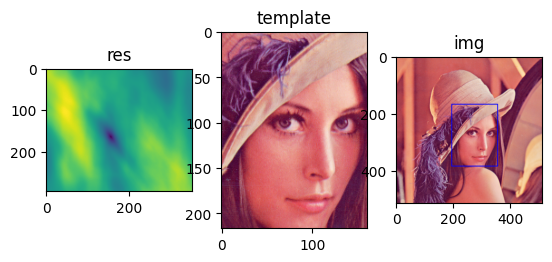

In [13]:
img_copy = img.copy()
top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_copy, top_left, bottom_right, 255, 2)
plt.subplot(131), plt.imshow(res[...,::-1]), plt.title('res')
plt.subplot(132), plt.imshow(template[...,::-1]), plt.title('template')
plt.subplot(133), plt.imshow(img_copy[...,::-1]), plt.title('img')